# It's time for the ANALYSIS!

In [1]:
import pandas as pd
from tqdm import tqdm
import os
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt

# magic word for producing visualizations in notebook
%matplotlib inline

In [2]:
# read in the json files
portfolio = pd.read_json('clean_data/portfolio.json')
profile = pd.read_json('clean_data/profile.json')
offers_influence = pd.read_json('clean_data/offers_influence.json')
offers = pd.read_json('clean_data/offers.json')

# Finding customer clusters based on their age, gender and months as user

In [3]:
profile.shape[0]

17000

In [4]:
not_null_profile = profile.dropna()

In [5]:
not_null_profile.shape[0]

14820

In [6]:
not_null_profile.sign_up_year.min()

2013

In [7]:
def months_since_2013(year, month):
    return ((year - 2013) * 12) + month

In [8]:
not_null_profile['months_since_2013'] = [months_since_2013(row.sign_up_year, row.sign_up_month) for index, row in not_null_profile.iterrows()]

/mnt/c/Users/Kevin/Documents/kevin/starbucks_challenge/env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
important_columns = ['age', 'income', 'F', 'M', 'O', 'months_since_2013']

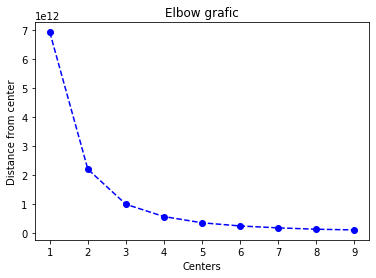

In [63]:
def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding SSE for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the SSE score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)

    # Then fit the model to your data using the fit method
    model = kmeans.fit(data)
    
    # Obtain a score related to the model fit
    score = np.abs(model.score(data))
    
    return score

scores = []
centers = list(range(1, 10, 1))

for center in centers:
    scores.append(get_kmeans_score(not_null_profile[important_columns], center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('Centers');
plt.ylabel('Distance from center');
plt.title('Elbow grafic'); 

In [64]:
kmeans = KMeans(n_clusters=4)
model = kmeans.fit(not_null_profile[important_columns])
not_null_profile['cluster'] = model.predict(not_null_profile[important_columns])

/mnt/c/Users/Kevin/Documents/kevin/starbucks_challenge/env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Understanding Cluster 0

In [65]:
cluster0 = not_null_profile[not_null_profile.cluster==0]

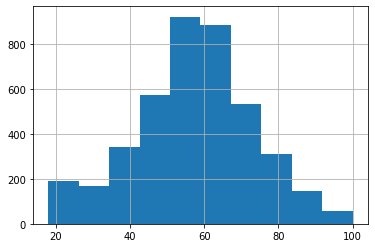

In [66]:
cluster0.age.hist()

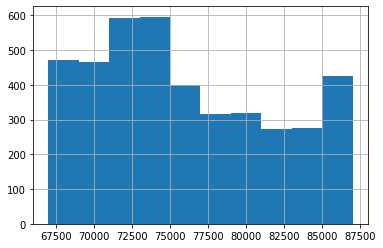

In [67]:
cluster0.income.hist()

In [75]:
print('M:', np.sum(cluster0['M']==1))
print('F:', np.sum(cluster0['F']==1))
print('O:', np.sum(cluster0['O']==1))

M: 2120
F: 1945
O: 64


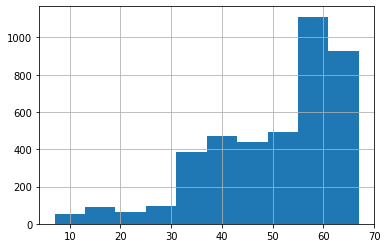

In [69]:
cluster0.months_since_2013.hist()

Cluster0 contains mature users between 50 & 70 years old, with an income between 67K - 87K

## Understanding Cluster 1

In [70]:
cluster1 = not_null_profile[not_null_profile.cluster==1]

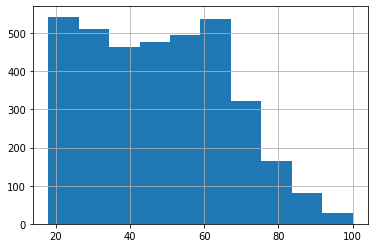

In [71]:
cluster1.age.hist()

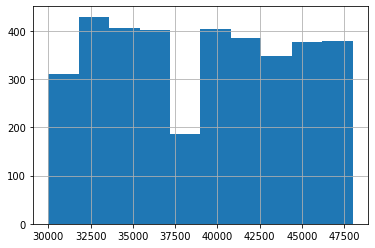

In [72]:
cluster1.income.hist()

In [76]:
print('M:', np.sum(cluster1['M']==1))
print('F:', np.sum(cluster1['F']==1))
print('O:', np.sum(cluster1['O']==1))

M: 2541
F: 1032
O: 50


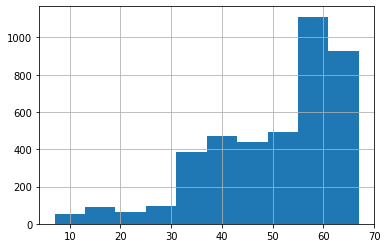

In [74]:
cluster0.months_since_2013.hist()

Cluster1 contains users with an income between 30K - 47K, and most of them are men

## Understanding Cluster 2

In [77]:
cluster2 = not_null_profile[not_null_profile.cluster==2]

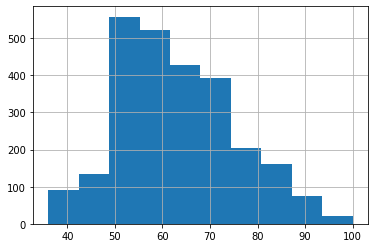

In [78]:
cluster2.age.hist()

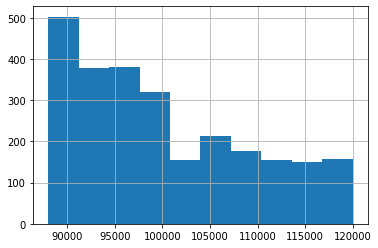

In [79]:
cluster2.income.hist()

In [80]:
print('M:', np.sum(cluster2['M']==1))
print('F:', np.sum(cluster2['F']==1))
print('O:', np.sum(cluster2['O']==1))

M: 1030
F: 1534
O: 26


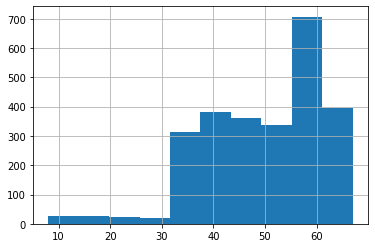

In [81]:
cluster2.months_since_2013.hist()

Cluster2 contains mature users most of them older than 50 years old, with an income higher than 90K with a soft tend to women.

## Understanding Cluster 3

In [82]:
cluster3 = not_null_profile[not_null_profile.cluster==3]

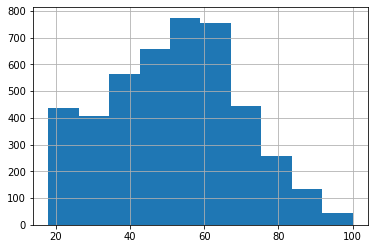

In [83]:
cluster3.age.hist()

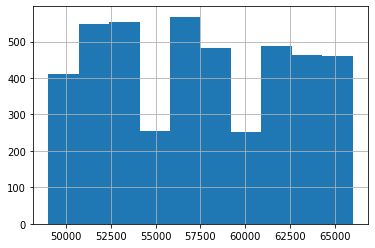

In [84]:
cluster3.income.hist()

In [85]:
print('M:', np.sum(cluster3['M']==1))
print('F:', np.sum(cluster3['F']==1))
print('O:', np.sum(cluster3['O']==1))

M: 2793
F: 1613
O: 72


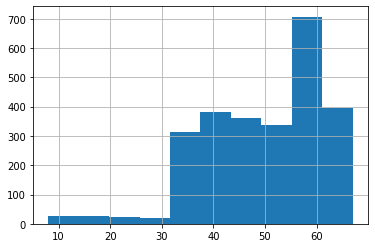

In [86]:
cluster2.months_since_2013.hist()

Cluster3 contains users with an income between 50K - 65K and the majority of them are men.

In [127]:
users_clustered = pd.concat([not_null_profile, pd.get_dummies(not_null_profile.cluster)], axis=1)

In [128]:
users_clustered = users_clustered[[0, 1, 2, 3, 'id']].rename(columns={0:'Cluster0', 1:'Cluster1', 2:'Cluster2', 3:'Cluster3', 'id':'person'})

In [129]:
users_clustered.to_json('clean_data/users_clustered.json')

In [130]:
users_clustered

,Cluster0,Cluster1,Cluster2,Cluster3,person
1,0,0,1,0,0610b486422d4921ae7d2bf64640c50b
3,0,0,1,0,78afa995795e4d85b5d9ceeca43f5fef
5,1,0,0,0,e2127556f4f64592b11af22de27a7932
8,0,0,0,1,389bc3fa690240e798340f5a15918d5c
12,0,0,0,1,2eeac8d8feae4a8cad5a6af0499a211d
...,...,...,...,...,...
16995,0,0,0,1,6d5f3a774f3d4714ab0c092238f3a1d7
16996,1,0,0,0,2cb4f97358b841b9a9773a7aa05a9d77
16997,1,0,0,0,01d26f638c274aa0b965d24cefe3183f
16998,0,0,0,1,9dc1421481194dcd9400aec7c9ae6366


# Finding the agregations of offers & transactions made by user

In [131]:
users_aggs = users_clustered.copy()
bogo_amount = offers_influence[offers_influence.bogo==1].groupby('person').sum().amount.reset_index().rename(columns={'amount': 'bogo_amount'})
bogo_count = offers_influence[offers_influence.bogo==1].groupby('person').count().bogo.reset_index().rename(columns={'bogo': 'bogo_count'})
informational_amount = offers_influence[offers_influence.informational==1].groupby('person').sum().amount.reset_index().rename(columns={'amount': 'informational_amount'})
informational_count = offers_influence[offers_influence.informational==1].groupby('person').count().informational.reset_index().rename(columns={'informational': 'informational_count'})
discount_amount = offers_influence[offers_influence.discount==1].groupby('person').sum().amount.reset_index().rename(columns={'amount': 'discount_amount'})
discount_count = offers_influence[offers_influence.discount==1].groupby('person').count().discount.reset_index().rename(columns={'discount': 'discount_count'})
not_influenced_amount = offers_influence[(offers_influence.bogo==0) & (offers_influence.discount==0) & (offers_influence.informational==0)].groupby('person').sum().amount.reset_index().rename(columns={'amount': 'not_influenced_amount'})
not_influenced_count = offers_influence[(offers_influence.bogo==0) & (offers_influence.discount==0) & (offers_influence.informational==0)].groupby('person').count().bogo.reset_index().rename(columns={'bogo': 'not_influenced_count'})

In [132]:
users_aggs = users_aggs.merge(bogo_amount, on='person', how='left')
users_aggs = users_aggs.merge(bogo_count, on='person', how='left')
users_aggs = users_aggs.merge(informational_amount, on='person', how='left')
users_aggs = users_aggs.merge(informational_count, on='person', how='left')
users_aggs = users_aggs.merge(discount_amount, on='person', how='left')
users_aggs = users_aggs.merge(discount_count, on='person', how='left')
users_aggs = users_aggs.merge(not_influenced_amount, on='person', how='left')
users_aggs = users_aggs.merge(not_influenced_count, on='person', how='left')
users_aggs.fillna(0, inplace=True)

In [133]:
users_aggs

,Cluster0,Cluster1,Cluster2,Cluster3,person,bogo_amount,bogo_count,informational_amount,informational_count,discount_amount,discount_count,not_influenced_amount,not_influenced_count
0,0,0,1,0,0610b486422d4921ae7d2bf64640c50b,23.22,1.0,0.00,0.0,0.00,0.0,53.79,2.0
1,0,0,1,0,78afa995795e4d85b5d9ceeca43f5fef,41.61,2.0,19.67,1.0,0.00,0.0,97.99,4.0
2,1,0,0,0,e2127556f4f64592b11af22de27a7932,18.42,1.0,0.00,0.0,18.42,1.0,39.31,2.0
3,0,0,0,1,389bc3fa690240e798340f5a15918d5c,25.17,2.0,0.00,0.0,26.89,2.0,0.00,0.0
4,0,0,0,1,2eeac8d8feae4a8cad5a6af0499a211d,0.00,0.0,0.00,0.0,12.43,2.0,3.19,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14815,0,0,0,1,6d5f3a774f3d4714ab0c092238f3a1d7,0.00,0.0,0.00,0.0,0.00,0.0,20.03,7.0
14816,1,0,0,0,2cb4f97358b841b9a9773a7aa05a9d77,6.46,1.0,0.00,0.0,0.00,0.0,19.51,6.0
14817,1,0,0,0,01d26f638c274aa0b965d24cefe3183f,0.00,0.0,7.67,2.0,0.00,0.0,32.07,6.0
14818,0,0,0,1,9dc1421481194dcd9400aec7c9ae6366,20.24,2.0,0.00,0.0,0.00,0.0,169.43,12.0


In [121]:
offers_influence

,person,event,time,amount,informational,discount,bogo
12654,02c083884c7d45b39cc68e1314fec56c,transaction,0,0.83,0,0,0
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,0,34.56,0,1,0
12659,54890f68699049c2a04d415abc25e717,transaction,0,13.23,0,0,0
12670,b2f1cd155b864803ad8334cdf13c4bd2,transaction,0,19.51,0,0,0
12671,fe97aa22dd3e48c8b143116a8403dd52,transaction,0,18.97,0,0,0
...,...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,1.59,0,0,0
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,9.53,0,0,0
306531,a00058cf10334a308c68e7631c529907,transaction,714,3.61,0,0,0
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,3.53,0,0,0


In [122]:
offers

,reward,difficulty,duration,bogo,discount,informational,social,mobile,email,web,person,start_time,due_time,viewed_time,completed_time
0,5,5,7,1,0,0,0,1,1,1,78afa995795e4d85b5d9ceeca43f5fef,0,168,6.0,132.0
1,5,20,10,0,1,0,0,0,1,1,a03223e636434f42ac4c3df47e8bac43,0,240,6.0,NaN
2,2,10,7,0,1,0,0,1,1,1,e2127556f4f64592b11af22de27a7932,0,168,18.0,NaN
3,2,10,10,0,1,0,1,1,1,1,8ec6ce2a7e7949b1bf142def7d0e0586,0,240,12.0,NaN
4,10,10,5,1,0,0,1,1,1,1,68617ca6246f4fbc85e91a2a49552598,0,120,84.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76272,10,10,7,1,0,0,1,1,1,0,d087c473b4d247ccb0abfef59ba12b0e,576,744,672.0,636.0
76273,2,10,7,0,1,0,0,1,1,1,cb23b66c56f64b109d673d5e56574529,576,744,NaN,156.0
76274,3,7,7,0,1,0,1,1,1,1,6d5f3a774f3d4714ab0c092238f3a1d7,576,744,588.0,NaN
76275,10,10,7,1,0,0,1,1,1,0,9dc1421481194dcd9400aec7c9ae6366,576,744,624.0,594.0
